# Setting up the environment

In [1]:
#import libraries etc for analysis

%matplotlib inline
from matplotlib import style, figure
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt
from datetime import timedelta

In [2]:
# importing Python SQL toolkit and Object Relational Mapper to be abe to use Python and SQL together, i.e. SQLAlchemy

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, Column, Integer, String, Table, Date, Numeric, inspect, desc, asc

In [3]:
# Use SQLAlchemy `create_engine` to connect to your sqlite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
inspector = inspect(engine)

In [5]:
# Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

#relect an existing database into a new model
Base = automap_base()
#reflect the tables
Base.prepare(engine, reflect=True)

#view all of the classes that automap found
Base.classes.keys()

#save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
#create session (link) from Python to the database
session = Session(engine)

# Setting up tables

In [7]:
#view tables to verify what we have
inspector.get_table_names()

['measurement', 'station']

In [8]:
#inspect Measurement table
mcolumns = inspector.get_columns('Measurement')
for column in mcolumns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
#inspect Station table
scolumns = inspector.get_columns('Station')
for column in scolumns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

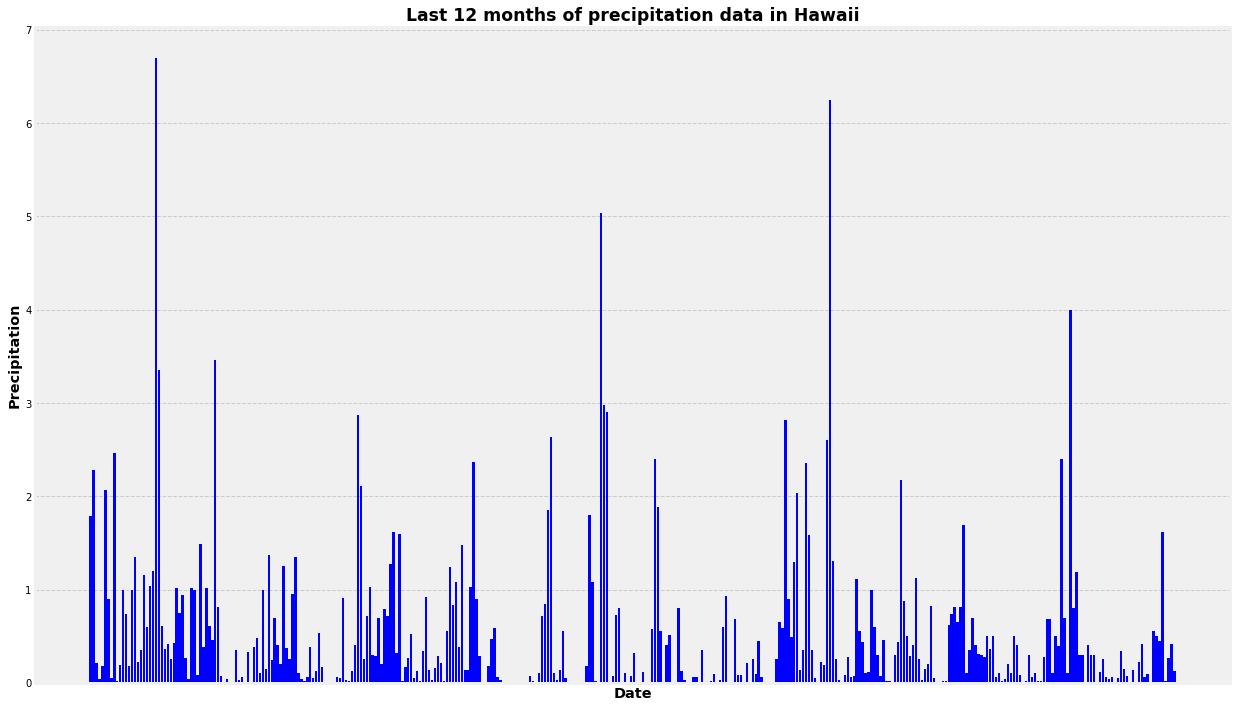

In [12]:
## (1) Design a query to retrieve the last 12 months of precipitation data and plot the results
# data needed for this analysis: precipitation data and dates

# query to view data present to be able to calculate the past year's query
precip12months = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).all()

# Calculate the date 1 year ago from the last data point in the database
date_previousyear = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data_previousyear = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_previousyear).all()
#print to verify
#print(data_previousyear)

# Save the query results as a Pandas DataFrame and set the index to the date column
previousyear_df = pd.DataFrame(data_previousyear, columns=['Date', 'Precipitation'])
previousyear_df.set_index('Date')

# Sort the dataframe by date
previousyear_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
x = previousyear_df['Date']
y = previousyear_df['Precipitation']

plt.bar(x, y, color='blue')
plt.tight_layout()
plt.xticks([])
plt.xlabel('Date', fontweight='bold', fontsize='x-large')
plt.ylabel('Precipitation', fontweight='bold', fontsize='x-large')
plt.title('Last 12 months of precipitation data in Hawaii', fontweight='bold', fontsize='xx-large')
plt.grid(linestyle='--')

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [13]:
## Use Pandas to calcualte the summary statistics for the precipitation data

previousyear_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
## Design a query to show how many stations are available in this dataset?

availablestations = session.query(Station).count()
availablestations

9

In [15]:
## What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

mostactivestations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

print(mostactivestations)

#The most active station was USC00519281, which had the most entries at 2772.

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [16]:
## Using the station id from the previous query, calculate the lowest temperature recorded, 
## highest temperature recorded, and average temperature of the most active station?

temperatures = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(temperatures)

[(54.0, 85.0, 71.66378066378067)]


In [38]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#similar query syntax to two previous queries
#here, we are finding the data for the previous year of just the most active station (i.e. that identified above)
data_previousyeartemp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= date_previousyear).\
    filter(Measurement.station == 'USC00519281').all()

         tobs
(1752,)  74.0
(1654,)  73.0
(1625,)  76.0
(1606,)  72.0
(1601,)  75.0
(1425,)  71.0
(1375,)  77.0
(1257,)  70.0
(1159,)  78.0
(1103,)  69.0
(785,)   79.0
(739,)   68.0
(614,)   80.0
(603,)   67.0
(440,)   66.0
(381,)   81.0
(355,)   65.0
(240,)   64.0
(186,)   63.0
(169,)   82.0
(135,)   62.0
(81,)    83.0
(77,)    61.0
(49,)    60.0
(36,)    84.0
(31,)    58.0
(20,)    59.0
(18,)    57.0
(12,)    56.0
(11,)    85.0
(4,)     87.0
(4,)     86.0
(1,)     55.0
(1,)     54.0
(1,)     53.0


([array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]

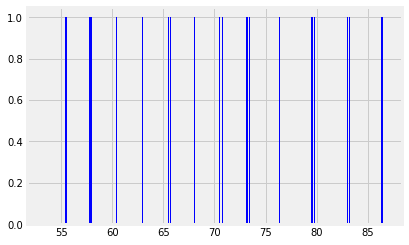

In [63]:
#plotting the histogram, using similar approach as above

# Use Pandas Plotting with Matplotlib to plot the data
#getting values for histogram

#The scale (i.e. x axis) of the graph should be range of the number of times that a 
#particular temperature was recorded.
temperatureresults = session.query(Measurement.date, Measurement.tobs).\
    group_by(Measurement.tobs).order_by(func.count(Measurement.tobs).desc()).all()

#The frequency (i.e. y axis) of the graph should be how many times a particular
#tempearature was measured.
temperaturefrequency  = session.query(func.count(Measurement.tobs)).\
    group_by(Measurement.tobs).order_by(func.count(Measurement.tobs).desc()).all()

#plotting the histogram
x = temperaturescale
y = temperaturefrequency

activestation_df = pd.DataFrame(temperaturescale, temperaturefrequency)
print(activestation_df)

plt.hist(activestation_df, bins=12,
         histtype='bar', 
         facecolor='b')